In [1]:
# Jupyter notebook to analyse zalandos fashion-mnist data set

import gzip
import numpy as np

# define functions to open the dataset files
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)

def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)


In [2]:
from keras.utils import to_categorical

X_train = open_images("data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("data/fashion/t10k-labels-idx1-ubyte.gz")

print(y_train)
# perform one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[9 0 0 ... 3 0 5]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


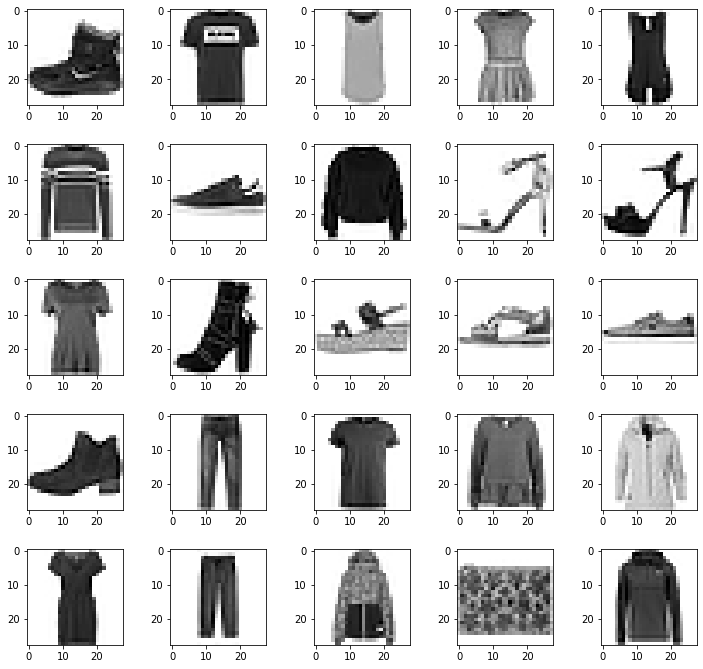

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# take a look at the dataeset by plotting the first couple of images

height = 5
width = 5
fig, ax = plt.subplots(width, height, figsize=(12, 12))
ax = ax.ravel()
for i in np.arange(0, height*width):
    ax[i].imshow(X_train[i].reshape(28, 28), "gray_r")
    
plt.subplots_adjust(wspace=0.5)


# The Fashion-MNIST dataset is already in shape so no further data  manipulation is required

In [5]:
# CNN for fashion-MNIST

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout


model = Sequential()
# add layers: input shape: each image is 28x28 with a depth of 1 pixel
model.add(Conv2D(30, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# train the model; passing 60,000 images to our model, each image is 28x28 pixels with a depth of 1 pixel
history = model.fit(
    X_train.reshape(60000, 28, 28, 1),
    y_train,
    epochs=30,
    batch_size=1000
)


Epoch 1/30
60/60 [==============================] - 11s 179ms/step - loss: 57.6729 - accuracy: 0.5066
Epoch 2/30
60/60 [==============================] - 11s 178ms/step - loss: 2.5056 - accuracy: 0.8370
Epoch 3/30
60/60 [==============================] - 11s 177ms/step - loss: 1.1414 - accuracy: 0.8522
Epoch 4/30
60/60 [==============================] - 11s 177ms/step - loss: 0.6909 - accuracy: 0.8656
Epoch 5/30
60/60 [==============================] - 11s 177ms/step - loss: 0.5014 - accuracy: 0.8814
Epoch 6/30
60/60 [==============================] - 11s 177ms/step - loss: 0.3919 - accuracy: 0.8944
Epoch 7/30
60/60 [==============================] - 11s 177ms/step - loss: 0.3506 - accuracy: 0.8978
Epoch 8/30
60/60 [==============================] - 11s 177ms/step - loss: 0.2995 - accuracy: 0.9078
Epoch 9/30
60/60 [==============================] - 11s 177ms/step - loss: 0.2698 - accuracy: 0.9118
Epoch 10/30
60/60 [==============================] - 11s 177ms/step - loss: 0.2378 - accur

In [6]:
# Evaluating the model using the test data

eval = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test, batch_size=1000)
print('Test Accuracy: {:f}'.format(eval[1]))

10/10 [==============================] - 0s 25ms/step - loss: 0.5445 - accuracy: 0.8852
Test Accuracy: 0.885200


In [7]:
# the predict function returns a detailed report on each image 

pred = model.predict(X_test.reshape(-1, 28, 28, 1))

In [8]:
# rearange the the prediction to fit the one-hot-encoding

y_pred = (pred > 0.5).astype("int32")
print(y_pred)
print(y_test)

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# create variables to represent the categories again

y_pred_cat = []
y_test_cat = []
for i in range(0, len(y_pred)):
    y_pred_cat.append(np.argmax(y_pred[i]))
    y_test_cat.append(np.argmax(y_test[i]))

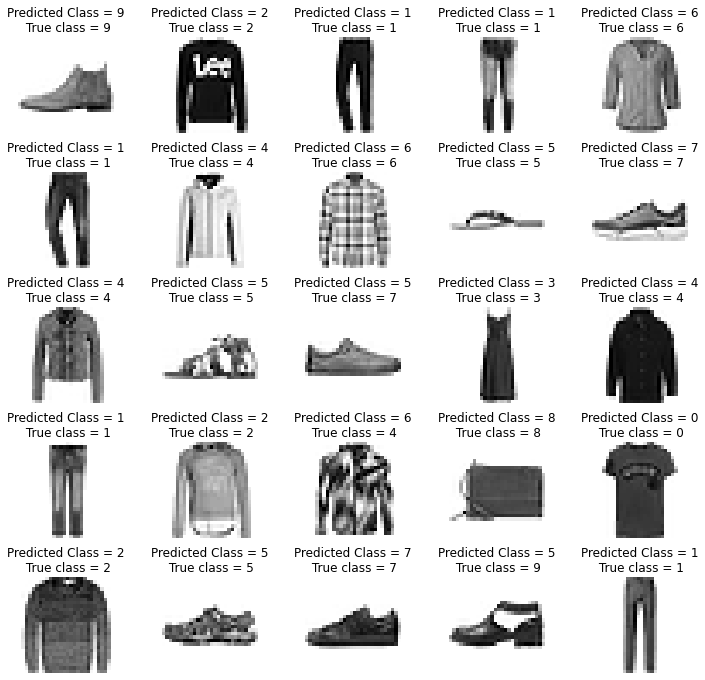

In [10]:
height = 5
width = 5

fig, ax = plt.subplots(height, width, figsize=(12,12))
ax=ax.ravel()
for i in np.arange(0, height*width):
    ax[i].imshow(X_test[i].reshape(28,28), "gray_r")
    ax[i].set_title('Predicted Class = {:}\n True class = {:}'.format(np.argmax(y_pred[i]),np.argmax(y_test[i])))
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

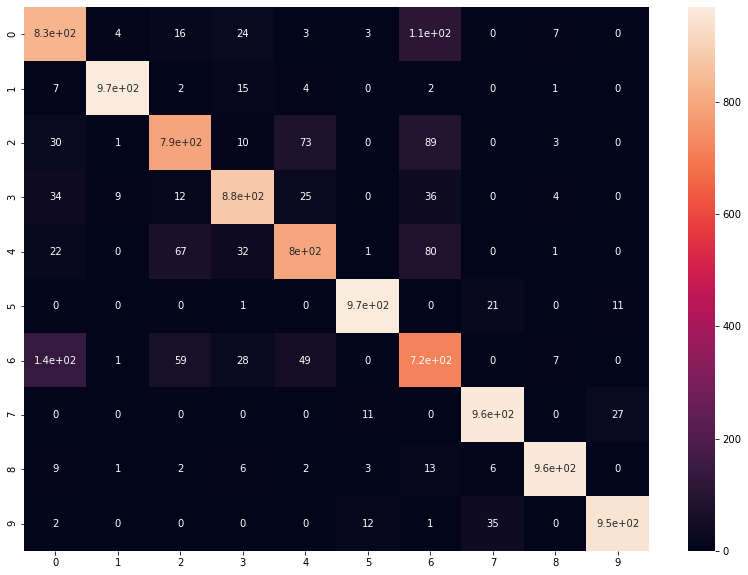

In [11]:
# create a confusion matrix to visualize our results 

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(14,10))
sns.heatmap(conf_mat, annot=True)